In [ ]:
#DOWNLOADING DATA FROM DRIVE
import glob
import os
import sys
import gdown
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir("dir/Diffusion")
print("Changed directory to:", os.getcwd())  # Verify the change

Changed directory to: /content/drive/MyDrive/Hari/Evaluation/Diffusion


In [ ]:
file_id = "1cJyPQzVOzsCZQctNBuHCqxHnOY7v7UiA"

path = "dir/Diffusion/data/dataset.zip"

gdown.download(f"https://drive.google.com/uc?id={file_id}", path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1cJyPQzVOzsCZQctNBuHCqxHnOY7v7UiA
From (redirected): https://drive.google.com/uc?id=1cJyPQzVOzsCZQctNBuHCqxHnOY7v7UiA&confirm=t&uuid=e349e54a-1748-4632-865c-6b9f58ffc4e8
To: /content/drive/MyDrive/Hari/Evaluation/Diffusion/data/dataset.zip
100%|██████████| 304M/304M [00:02<00:00, 137MB/s]


'/content/drive/MyDrive/Hari/Evaluation/Diffusion/data/dataset.zip'

In [ ]:
!unzip "dir/Diffusion/data/dataset.zip" -d "dir/Diffusion/data/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Hari/Evaluation/Diffusion/data/Samples/sample4696.npy  
  inflating: /content/drive/MyDrive/Hari/Evaluation/Diffusion/data/__MACOSX/Samples/._sample4696.npy  
  inflating: /content/drive/MyDrive/Hari/Evaluation/Diffusion/data/Samples/sample1936.npy  
  inflating: /content/drive/MyDrive/Hari/Evaluation/Diffusion/data/__MACOSX/Samples/._sample1936.npy  
  inflating: /content/drive/MyDrive/Hari/Evaluation/Diffusion/data/Samples/sample6081.npy  
  inflating: /content/drive/MyDrive/Hari/Evaluation/Diffusion/data/__MACOSX/Samples/._sample6081.npy  
  inflating: /content/drive/MyDrive/Hari/Evaluation/Diffusion/data/Samples/sample156.npy  
  inflating: /content/drive/MyDrive/Hari/Evaluation/Diffusion/data/__MACOSX/Samples/._sample156.npy  
  inflating: /content/drive/MyDrive/Hari/Evaluation/Diffusion/data/Samples/sample1922.npy  
  inflating: /content/drive/MyDrive/Hari/Evaluation/Diffusion/data/__MACOSX/Sam

In [ ]:
directory = "dir/Diffusion/data/Samples"
num = len(os.listdir(directory))

print(f"Number of files in {directory}: {num}")


Number of files in /content/drive/MyDrive/Hari/Evaluation/Diffusion/data/Samples: 10000


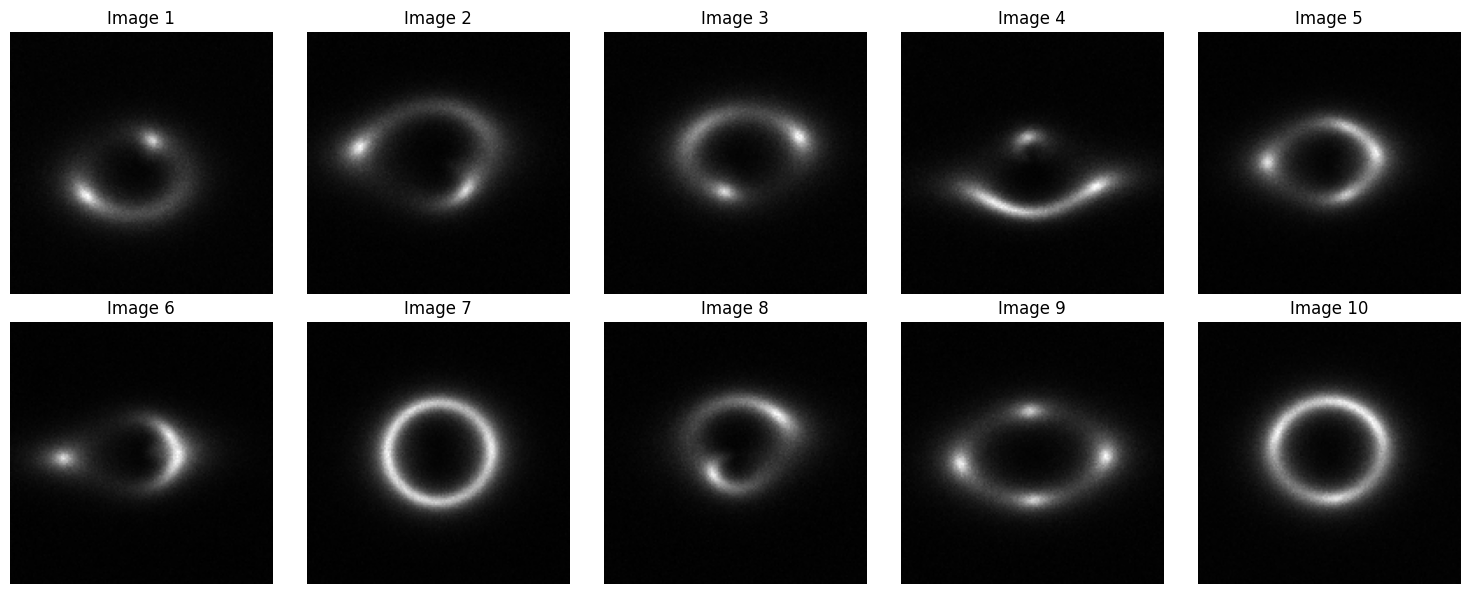

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random

directory = "dir/Evaluation/Diffusion/data/Samples"

npy_files = [f for f in os.listdir(directory) if f.endswith('.npy')]

selected_files = random.sample(npy_files, 10)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, file in enumerate(selected_files):
    img_path = os.path.join(directory, file)
    img = np.load(img_path)  # Load the .npy file

    # Ensure correct shape (1, 150, 150) -> reshape to (150, 150)
    img = img.squeeze()  # Remove single channel dimension

    ax = axes[i // 5, i % 5]
    ax.imshow(img, cmap="gray")  # Assuming grayscale images
    ax.axis("off")
    ax.set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()


In [ ]:
#SAVING THE .npy files into one .npz file to ease the loading process:
os.chdir("dir/Diffusion/")
sys.path.append(os.path.abspath("src"))
from npy_npz import save_to_npz
from dataset import LensingDataset

In [ ]:
inp_path = "dir/Diffusion/data/"
out_path = "dir/Diffusion/data/samples.npz"
save_to_npz(inp_path,out_path)

Processing Samples: 100%|██████████| 10000/10000 [07:51<00:00, 21.21it/s]


Saved dataset to /content/drive/MyDrive/Hari/Evaluation/Diffusion/data/samples.npz


In [ ]:
dataset = LensingDataset("dir/Diffusion/data/samples.npz")

In [ ]:
from torch.utils.data import DataLoader

#dataset = LensingDataset("dataset/samples.npz")
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Check one batch
batch = next(iter(dataloader))
print(batch.shape)  #(32, 1, 150, 150)


torch.Size([32, 1, 150, 150])


(10000, 1, 150, 150)


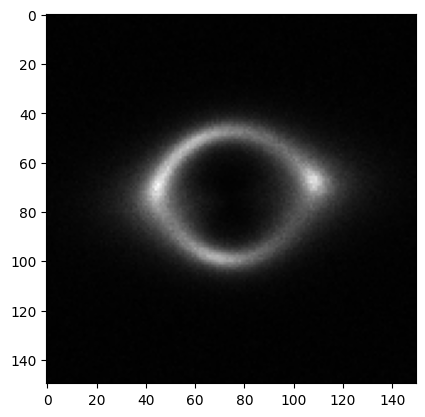

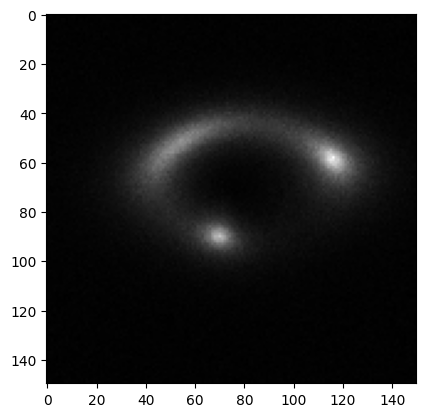

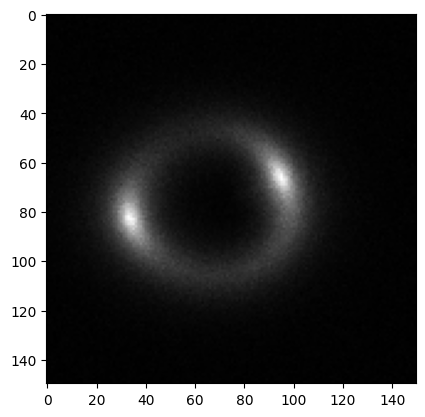

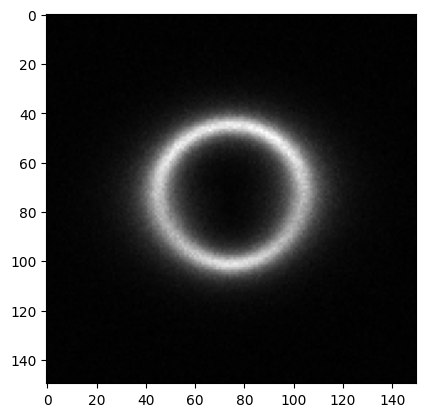

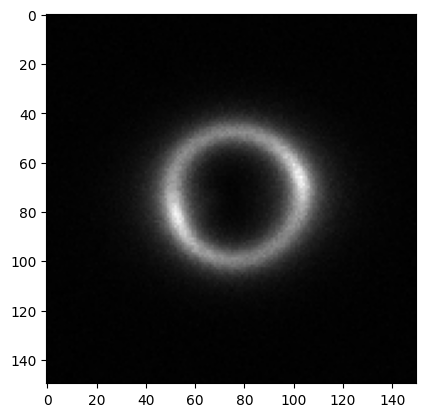

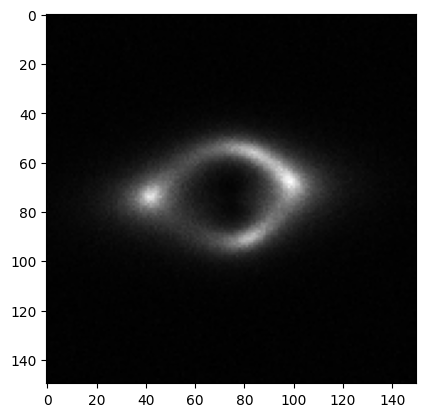

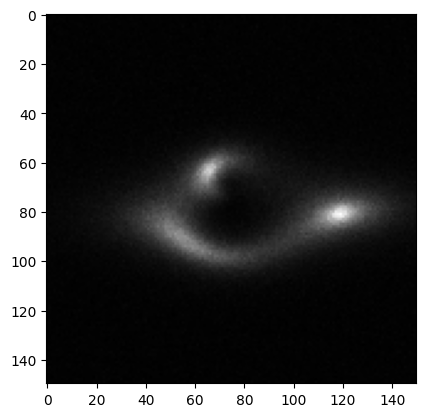

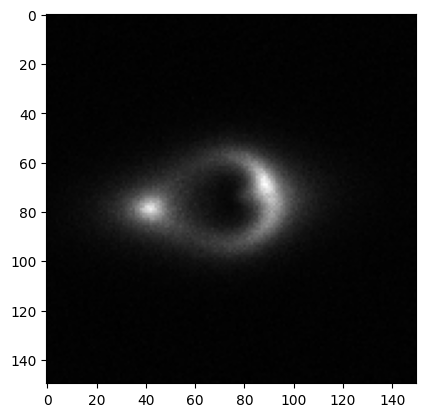

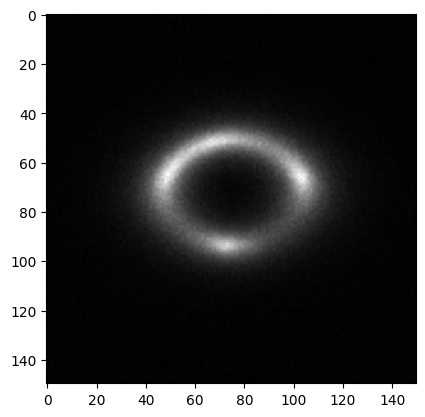

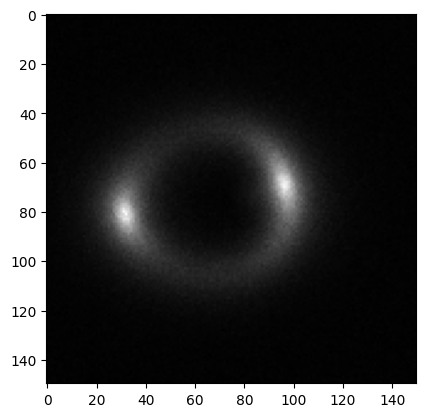

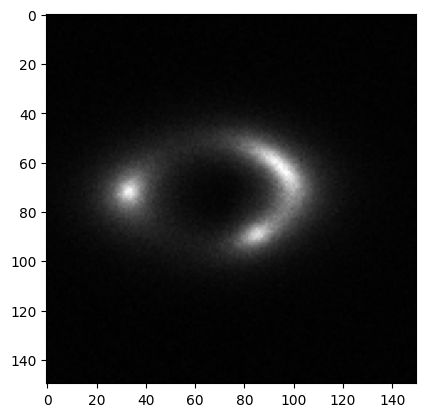

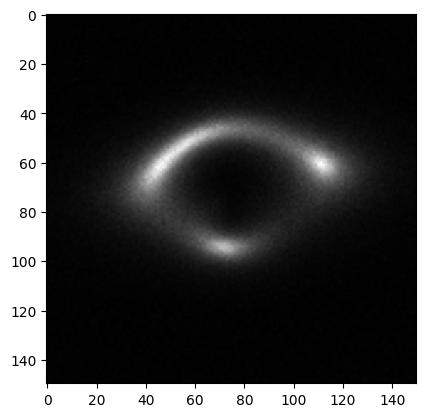

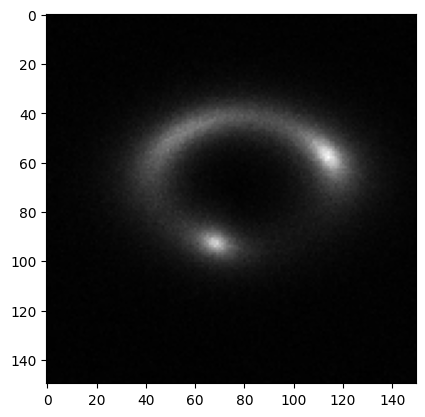

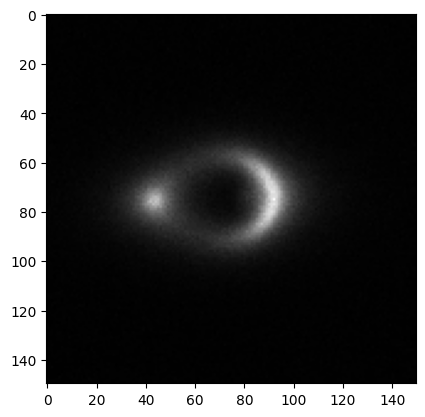

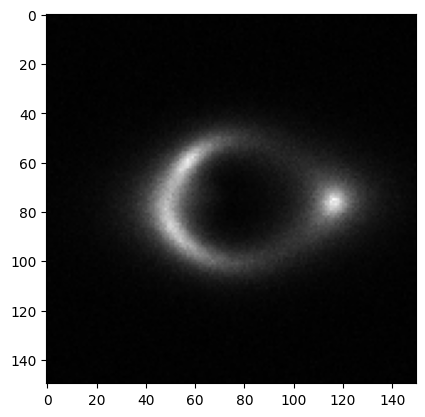

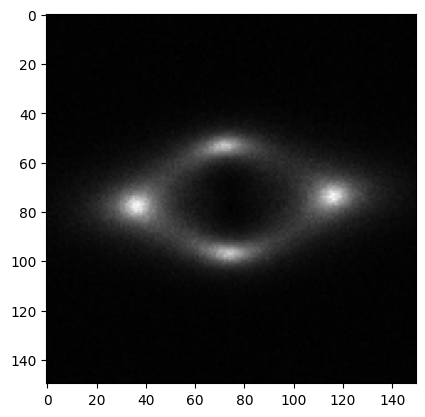

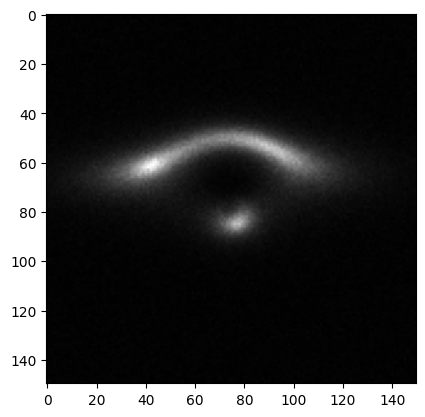

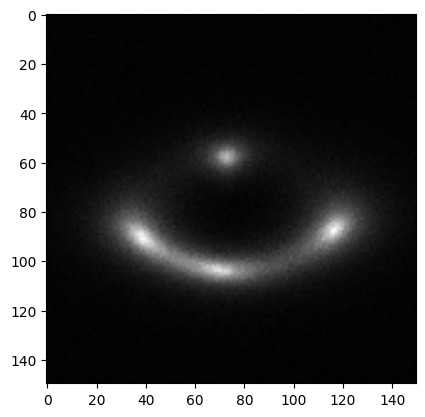

KeyboardInterrupt: 

In [ ]:
npz_file = "dir/Diffusion/data/samples.npz"
with np.load(npz_file) as data:
            for label in data.files:
                imgs = data[label]
                print(imgs.shape)
                for img in imgs:
                  imgi = np.array(img)

                break

In [ ]:
data = np.load("dir/Diffusion/data/samples.npz")
print(data.files)

['Samples']
